# Lab 02: Probability, Distributions, and Statistical Questions
## Problem 1

- In the hypothetical telescope I'm using, there is a background of cosmic-rays (electrons and protons, mostly) that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma-ray source, I am asking what is the probability that the cosmic-ray background would have given me a measurement as signal-like or more than the signal that you received.
  - I assume that in 1 day, the average cosmic-ray background labelled $x$, which is equal to 3
  - I also assume that in 1 day, the average amount of gamma particles emitted from this source is labelled $y$, which is equal to 8
    - So I want to know what the probability is that the background Poisson distribution would give me a signal that is greater than or equal to my measurement of $y=8$
    
- First, I want to show how the Poisson-distributed background changes as I sum for it over an increasing number of days
  - I can show this change by taking my background and convolving it with itself several times over, and plotting the results

In [3]:
# Finch's Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import random
%matplotlib inline

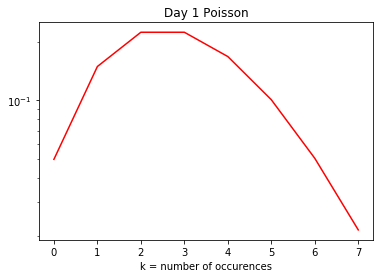

In [68]:
# Let's plot a Day-1 Poisson Distribution
fig, ax = plt.subplots(1,1)
plt.yscale('log')
lamda = muX = 3
k = np.sort(stats.poisson.rvs(mu=muX, size=100))

Poisson1 = stats.poisson.pmf(k, mu=muX)
ax.plot(k, Poisson1, 'r-', ms=8, label='Poisson PMF')
plt.xlabel('k = number of occurences')
plt.title('Day 1 Poisson')
plt.show()

In [52]:
Day5 = 4
for i in range(Day5):
    if i == 0:
        k = np.sort(stats.poisson.rvs(mu=lamda, size=1000))
        PoissonA = stats.poisson.pmf(k, muX)
        Poisson5 = np.convolve(PoissonA, PoissonA, mode='full')
    else:
        k5 = np.sort(stats.poisson.rvs(mu=muX*(i+1), size=len(Poisson5)))
        PoissonA = stats.poisson.pmf(k, muX)
        Poisson5 = np.convolve(PoissonA, Poisson5, mode='full')

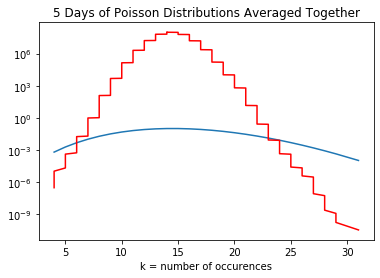

In [61]:
fig, ax = plt.subplots(1,1)
plt.yscale('log')
muX = 3
k5 = np.sort(stats.poisson.rvs(mu=5*muX, size=len(Poisson5)))
# Plot a standard Poisson Distribution with a mu of 15
ax.plot(k5, stats.poisson.pmf(k5, mu=15), label='Poisson Fit')

# Plot the Poisson Distribution averaged over 5 observing days
ax.plot(k5, Poisson5, 'r-', ms=8, label='Poisson PMF')
plt.xlabel('k = number of occurences')
plt.title('5 Days of Poisson Distributions Averaged Together')
plt.show()

- As we sum over more and more days, the mean becomes larger and larger
- The lower bound stays at zero on the average 